In [80]:

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import imutils
import easyocr

In [118]:
img  = cv2.imread('car.jpg')

In [119]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale

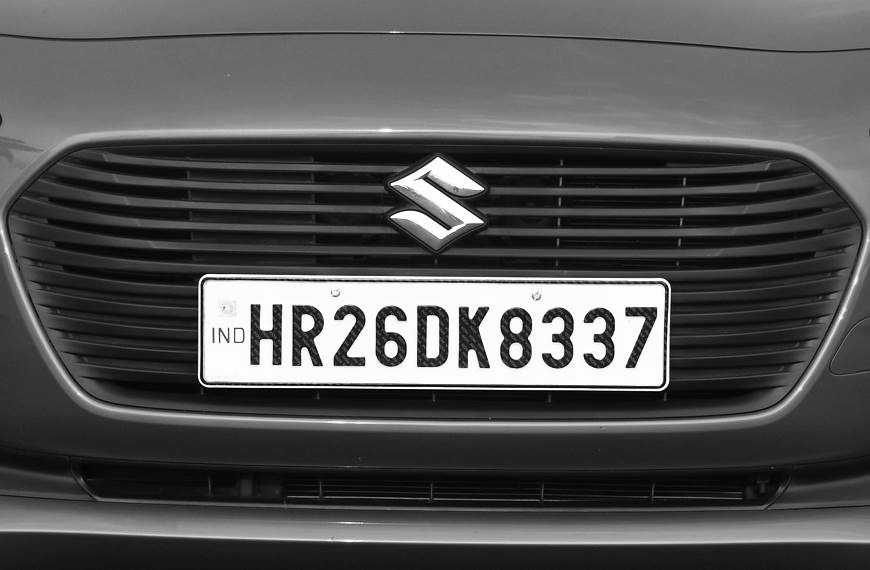

In [120]:
cv2_imshow(gray)

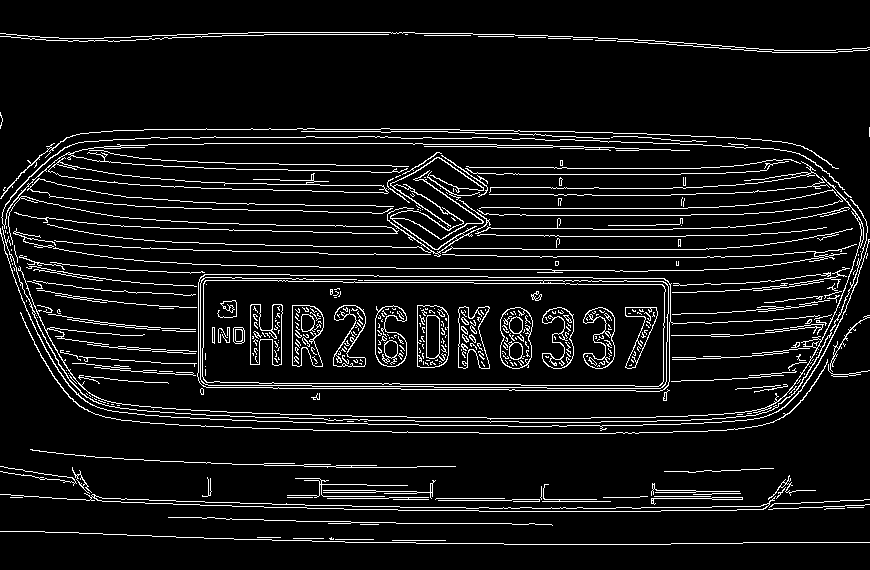

In [121]:
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection
cv2_imshow(edged)

In [122]:
contours=cv2.findContours(edged.copy(),cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [123]:
for c in contours:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

In [124]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

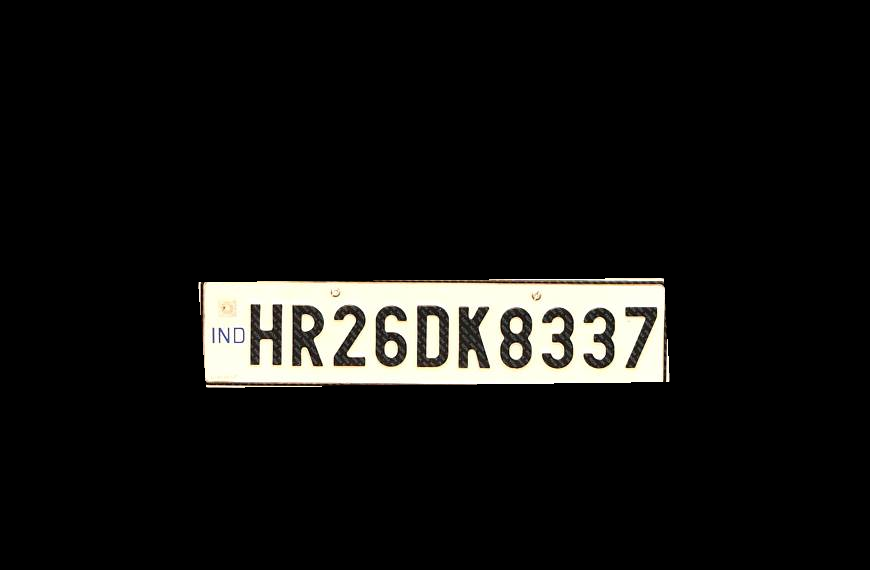

In [125]:
cv2_imshow(new_image)

In [126]:
x, y = np.where(mask == 255)
topx, topy = (np.min(x), np.min(y))
bottomx, bottomy = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

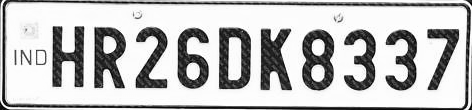

In [127]:
cv2_imshow(Cropped)

In [128]:
text = easyocr.Reader(["en"])
final = text.readtext(Cropped)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [129]:
final

[([[8, 44], [52, 44], [52, 70], [8, 70]], 'IND', 0.9987452098989309),
 ([[42, 13], [469, 13], [469, 104], [42, 104]],
  'HRZGDK8337',
  0.6558079172071397)]

In [131]:
text1 = final[1][-2]

In [132]:
text1

'HRZGDK8337'